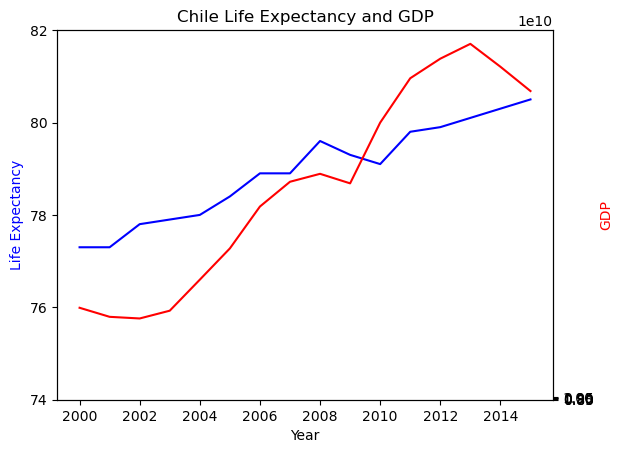

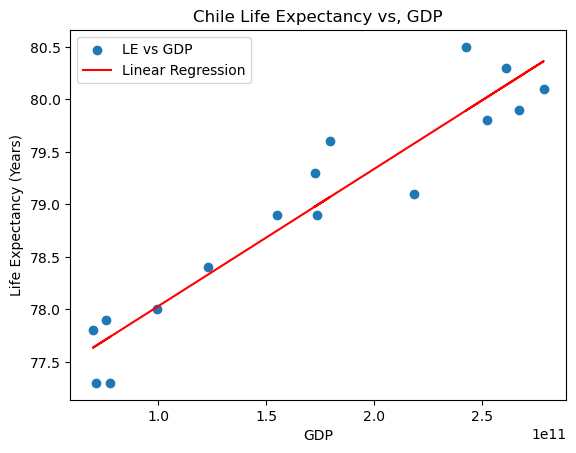

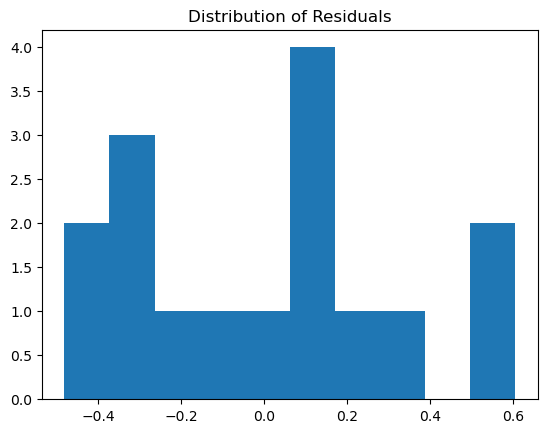

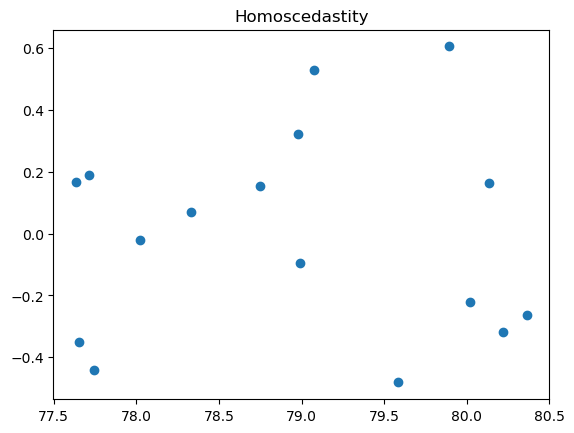

<Figure size 640x480 with 0 Axes>

In [111]:
#Answer the following questions
#  is there an overall link between le and gdp?   -Done Yes
#  is there an individual link for each country?   -Done yes
#  is there a lag in gdp and le, does le improve after gdp does? -Done doesnt appear so
#  Maybe run a linear regression model  -Done
#  Write a function that plots all the graphs   -Done 



#Setup the initial plots for GDP overlayed on top of life expectancy and plot life expectancy vs GDP.
chile = df[df.Country == 'Chile']

#Create a linear regression model

model = sm.OLS.from_formula('life_expectancy ~ GDP', data = chile)
results = model.fit()

fitted_values = results.predict(chile)
residuals = chile.life_expectancy - fitted_values

# Plot gdp and life_expectancy on the same graph with differnt y axis
line1 = np.array([74, 76, 78, 80, 82])
line2 = np.array([8000000000, 8500000000, 9000000000, 9500000000, 10000000000])

fig, ax1 = plt.subplots()

ax1.plot(chile.Year, chile.life_expectancy, label='Life Expectancy (Years)', color='b')
ax1.set_xlabel('Year')
ax1.set_yticks(line1)
ax1.set_ylabel('Life Expectancy', color='b')

ax2 = ax1.twinx()

ax2.plot(chile.Year, chile.GDP, label='GDP', color='r')
ax2.set_yticks(line2)
ax2.set_ylabel('GDP', color='r')
plt.title('Chile Life Expectancy and GDP')
plt.show()
plt.clf()

#Plot a linear regression model on top of the scatter plot for life_expectancy vs GDP
plt.scatter(chile.GDP, chile.life_expectancy, label = 'LE vs GDP')
plt.plot(chile.GDP, results.predict(chile.GDP), color = 'r', label = 'Linear Regression')
plt.title('Chile Life Expectancy vs, GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (Years)')
plt.legend()
plt.show()
plt.clf()



# Plot the normality of the residuals, they should look like a bell curve
plt.hist(residuals)
plt.title('Distribution of Residuals')
plt.show()
plt.clf()


# Check for homoscedastity with a scatter plot.  Points should be random with no pattern.
plt.scatter(fitted_values, residuals)
plt.title('Homoscedastity')
plt.show()
plt.clf()



In [73]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import statsmodels.api as sm

df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [74]:
#Find what countries are in the data
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [75]:
#Find what time span the data covers
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [76]:
#Search for any missing or null values
print(df.info())
print(df[df.isnull().any(axis=1)])
#Seems there are no missing values
print(df.GDP.value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Empty DataFrame
Columns: [Country, Year, Life expectancy at birth (years), GDP]
Index: []
GDP
7.786093e+10    1
7.097992e+10    1
1.390000e+13    1
1.310000e+13    1
1.230000e+13    1
               ..
9.607220e+12    1
8.560550e+12    1
7.572550e+12    1
6.100620e+12    1
1.630467e+10    1
Name: count, Length: 96, dtype: int64


In [77]:
#Let's rename the Life expectancy at birth (years) column to a shorter name
df = df.rename({"Life expectancy at birth (years)":"life_expectancy"}, axis = "columns")
print(df.head())

  Country  Year  life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


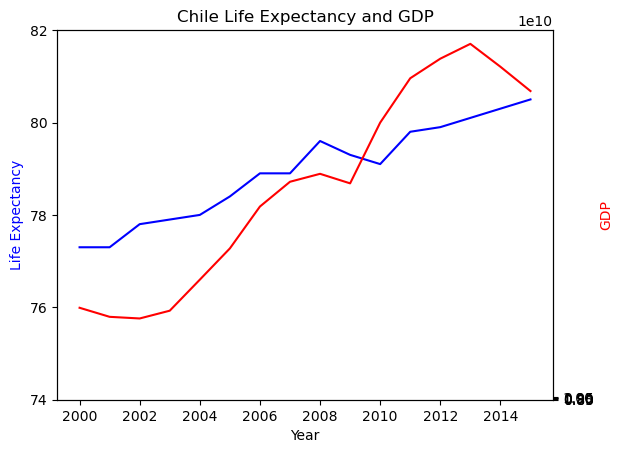

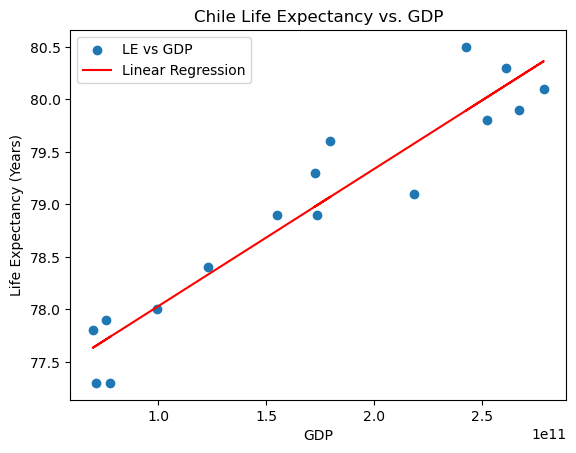

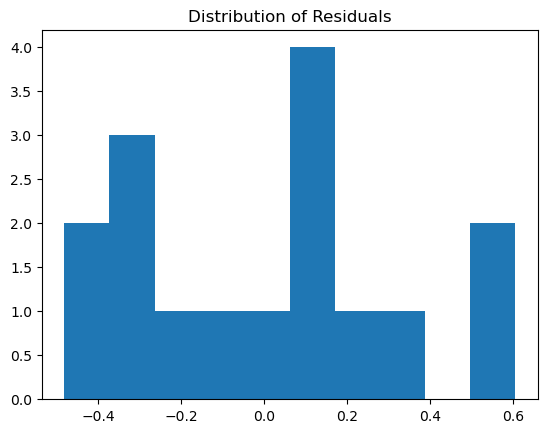

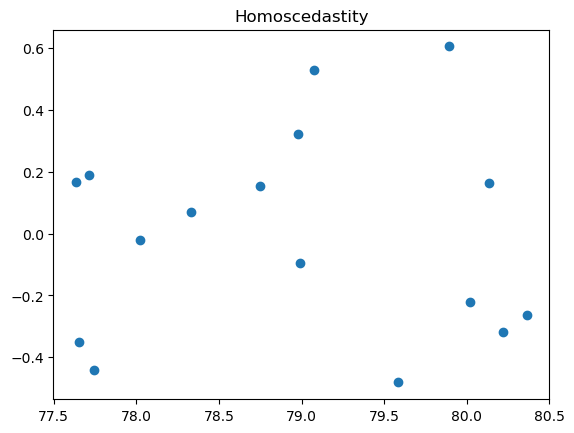

<Figure size 640x480 with 0 Axes>

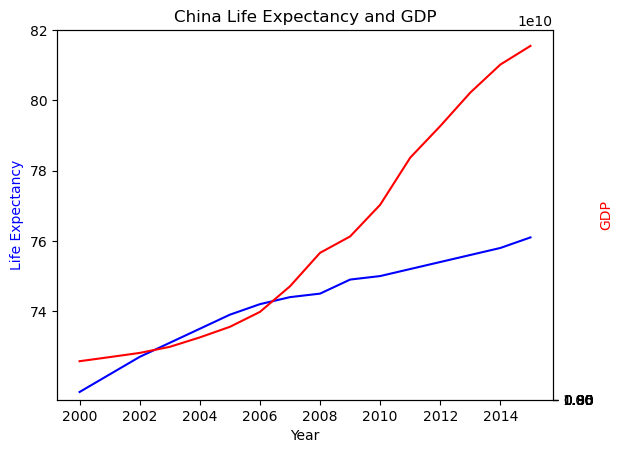

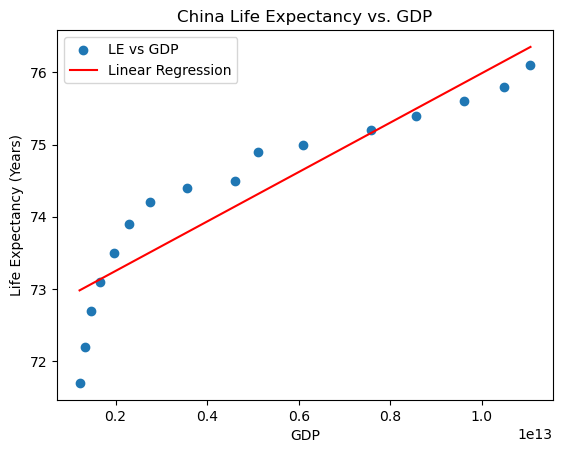

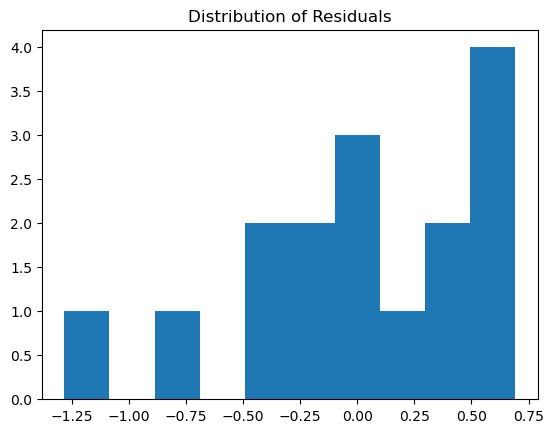

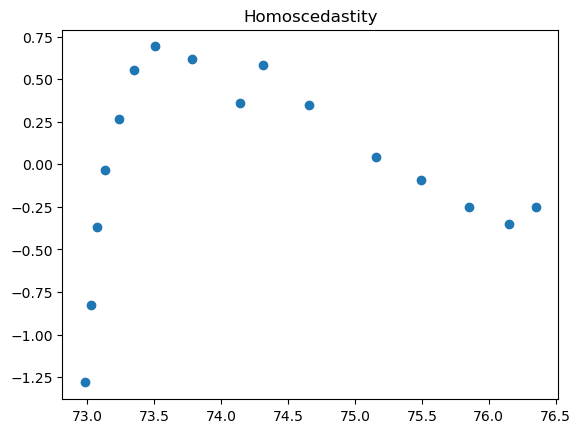

<Figure size 640x480 with 0 Axes>

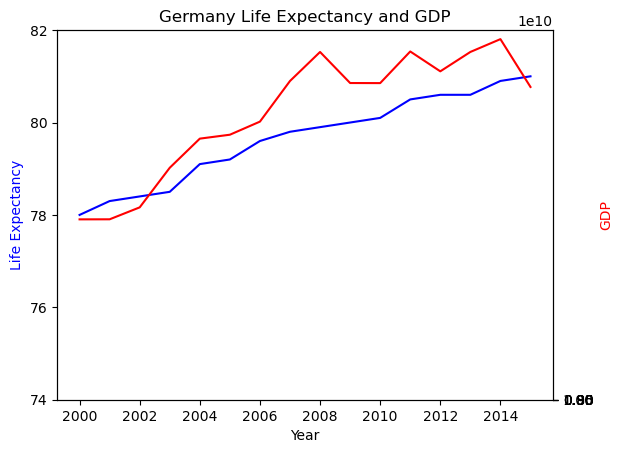

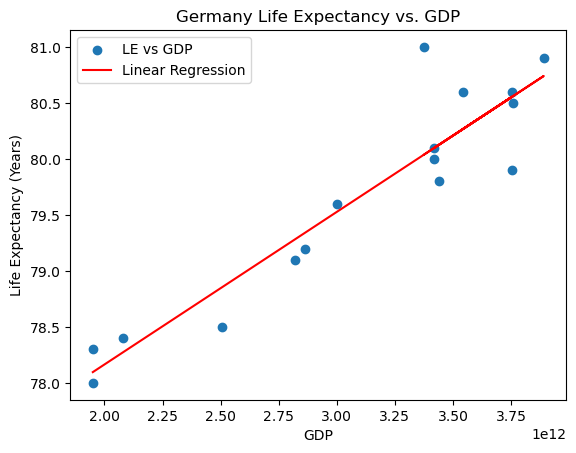

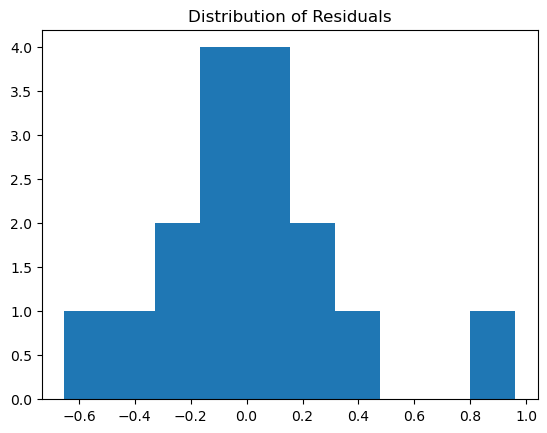

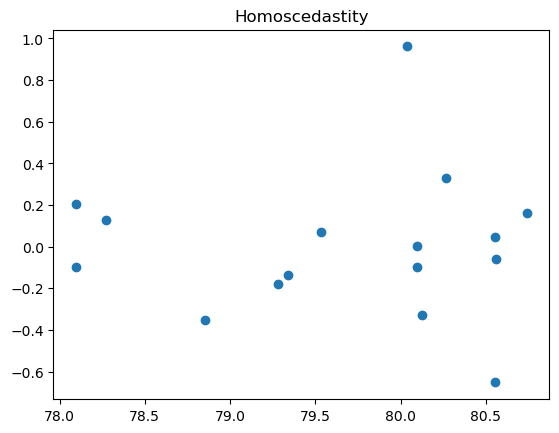

<Figure size 640x480 with 0 Axes>

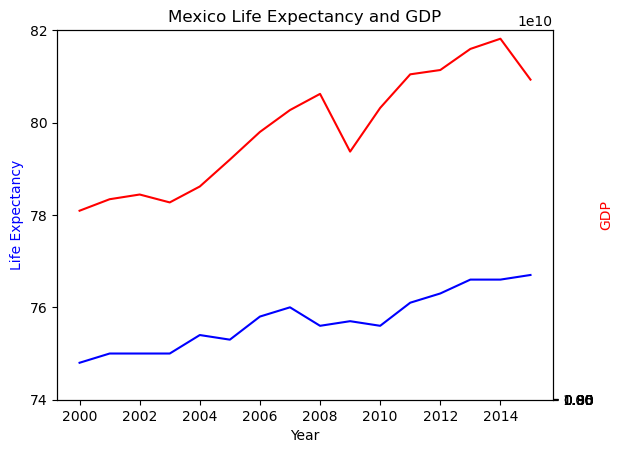

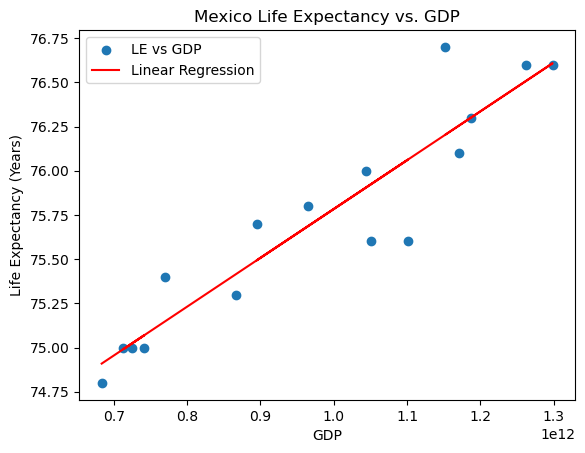

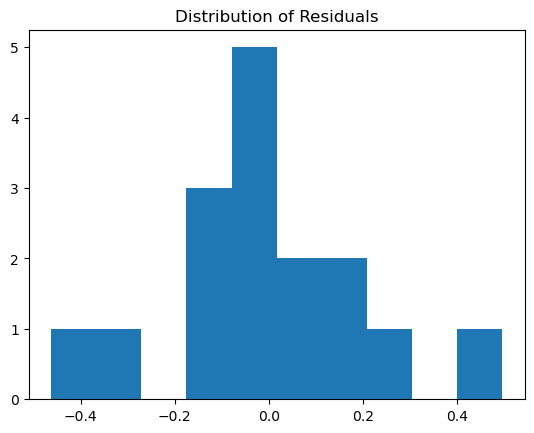

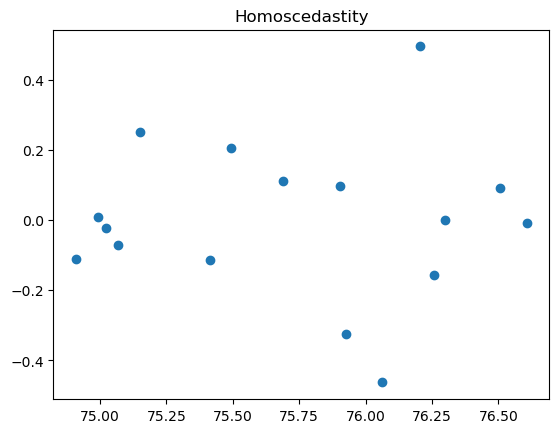

<Figure size 640x480 with 0 Axes>

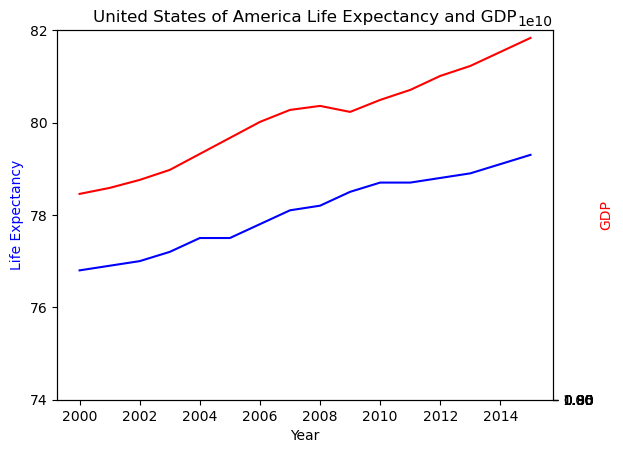

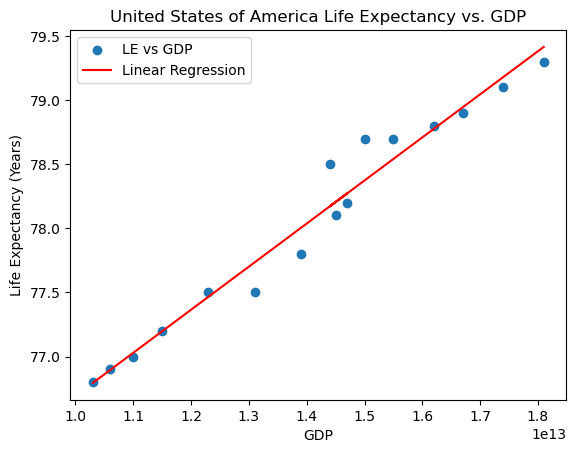

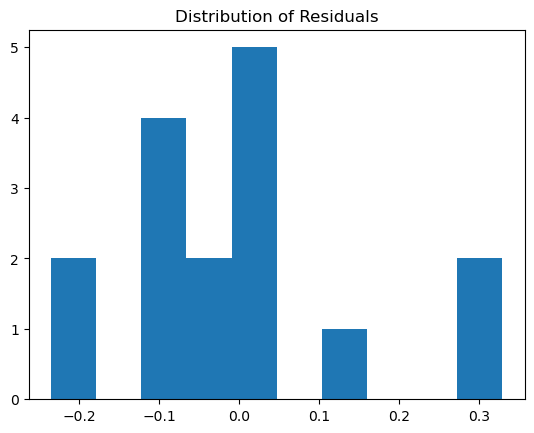

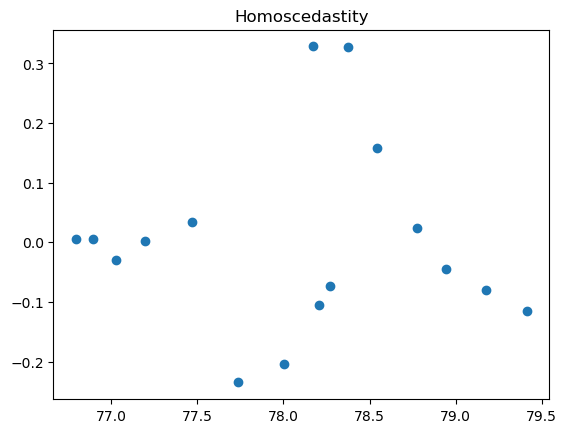

<Figure size 640x480 with 0 Axes>

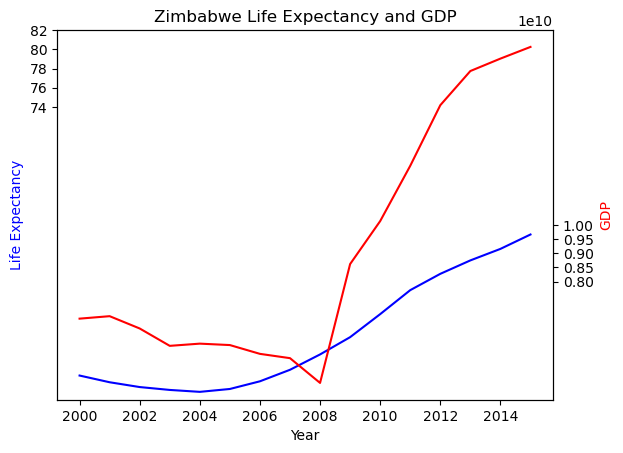

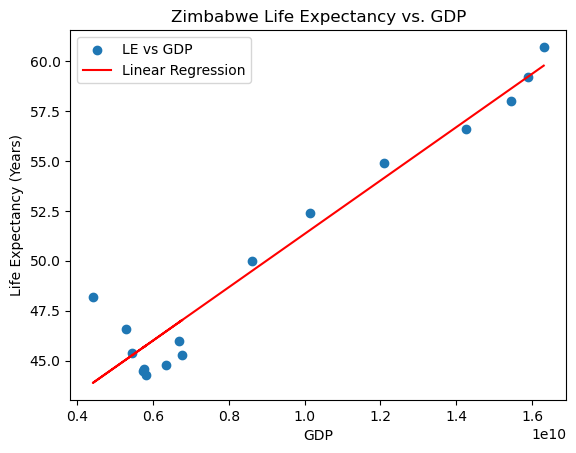

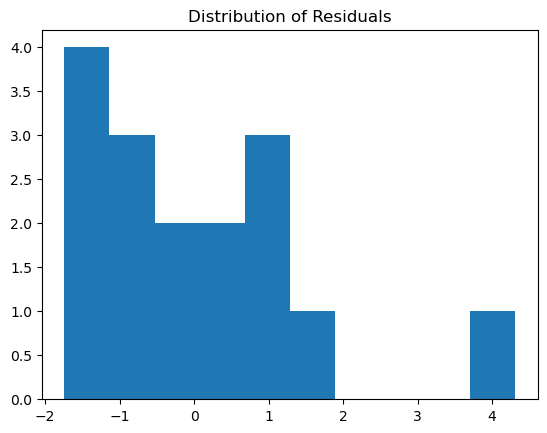

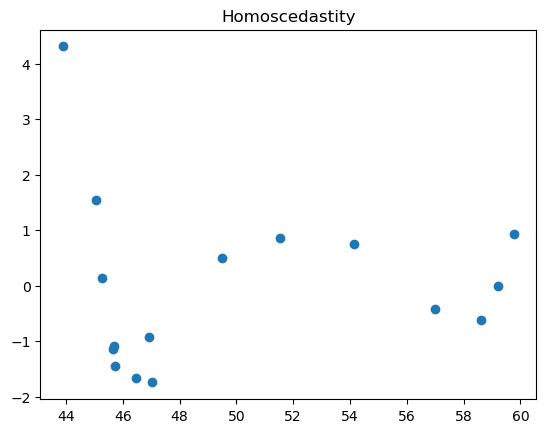

Here we can see that there is a clear relationship between life expectancy and GDP.  Our linear regression model fits the assumption of linear functional form for all countries, while it does not saitify the normality assumption for most countries.  It does however met the homescedastity assumption for most countries.


<Figure size 640x480 with 0 Axes>

In [110]:
# Write a function to loop through each country to plot the two graphs from above.


def plot_loop(df):
    country_list = df.Country.unique()
    for i in country_list:
        #Setup the initial plots for GDP overlayed on top of life expectancy and plot life expectancy vs GDP.
        i = df[df.Country == i]

        #Create a linear regression model

        model = sm.OLS.from_formula('life_expectancy ~ GDP', data = i)
        results = model.fit()

        fitted_values = results.predict(i)
        residuals = i.life_expectancy - fitted_values

        # Plot gdp and life_expectancy on the same graph with differnt y axis
        line1 = np.array([74, 76, 78, 80, 82])
        line2 = np.array([8000000000, 8500000000, 9000000000, 9500000000, 10000000000])

        fig, ax1 = plt.subplots()

        ax1.plot(i.Year, i.life_expectancy, label='Life Expectancy (Years)', color='b')
        ax1.set_xlabel('Year')
        ax1.set_yticks(line1)
        ax1.set_ylabel('Life Expectancy', color='b')

        ax2 = ax1.twinx()

        ax2.plot(i.Year, i.GDP, label='GDP', color='r')
        ax2.set_yticks(line2)
        ax2.set_ylabel('GDP', color='r')
        plt.title(i.Country.values[0] + ' Life Expectancy and GDP')
        plt.show()
        plt.clf()

        #Plot a linear regression model on top of the scatter plot for life_expectancy vs GDP
        plt.scatter(i.GDP, i.life_expectancy, label = 'LE vs GDP')
        plt.plot(i.GDP, results.predict(i.GDP), color = 'r', label = 'Linear Regression')
        plt.title(i.Country.values[0] + ' Life Expectancy vs. GDP')
        plt.xlabel('GDP')
        plt.ylabel('Life Expectancy (Years)')
        plt.legend()
        plt.show()
        plt.clf()



        # Plot the normality of the residuals, they should look like a bell curve
        plt.hist(residuals)
        plt.title('Distribution of Residuals')
        plt.show()
        plt.clf()


        # Check for homoscedastity with a scatter plot.  Points should be random with no pattern.
        plt.scatter(fitted_values, residuals)
        plt.title('Homoscedastity')
        plt.show()
        plt.clf()


        
plot_loop(df)

print('Here we can see that there is a clear relationship between life expectancy and GDP.  Our linear regression model fits the assumption of linear functional form for all countries, while it does not saitify the normality assumption for most countries.  It does however met the homescedastity assumption for most countries.')
        